# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (40% Off: **traskud17**)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem"


- Curate a Dataset
- Developing a "Predictive Theory"
- **PROJECT 1**: Quick Theory Validation


- Transforming Text to Numbers
- **PROJECT 2**: Creating the Input/Output Data


- Putting it all together in a Neural Network
- **PROJECT 3**: Building our Neural Network


- Understanding Neural Noise
- **PROJECT 4**: Making Learning Faster by Reducing Noise


- Analyzing Inefficiencies in our Network
- **PROJECT 5**: Making our Network Train and Run Faster


- Further Noise Reduction
- **PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary


- Analysis: What's going on in the weights?

# Lesson: Curate a Dataset

In [7]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [8]:
len(reviews)

25000

In [9]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [10]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory

In [11]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation

In [12]:
from collections import Counter
import numpy as np

In [13]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [18]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [19]:
positive_counts.most_common()

[('', 2201872),
 ('the', 693296),
 ('.', 638616),
 ('and', 358888),
 ('a', 334752),
 ('of', 307420),
 ('to', 266984),
 ('is', 228980),
 ('in', 200860),
 ('br', 196940),
 ('it', 192100),
 ('i', 162972),
 ('that', 142520),
 ('this', 140320),
 ('s', 135260),
 ('as', 105232),
 ('with', 92988),
 ('for', 89664),
 ('was', 87668),
 ('film', 83748),
 ('but', 83288),
 ('movie', 76296),
 ('his', 68908),
 ('on', 68032),
 ('you', 66724),
 ('he', 65128),
 ('are', 59228),
 ('not', 57088),
 ('t', 54880),
 ('one', 54620),
 ('have', 50348),
 ('be', 49664),
 ('by', 47988),
 ('all', 47768),
 ('who', 45856),
 ('an', 45176),
 ('at', 44936),
 ('from', 43068),
 ('her', 41896),
 ('they', 39580),
 ('has', 36744),
 ('so', 36616),
 ('like', 36152),
 ('about', 33252),
 ('very', 33220),
 ('out', 32536),
 ('there', 32228),
 ('she', 31116),
 ('what', 30948),
 ('or', 30928),
 ('good', 30880),
 ('more', 30084),
 ('when', 29824),
 ('some', 29764),
 ('if', 29140),
 ('just', 28608),
 ('can', 28004),
 ('story', 27120),
 ('

In [20]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [21]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 6.0776422433490342),
 ('antwone', 5.8636311755980968),
 ('din', 5.7930136083841441),
 ('gunga', 5.575949103146316),
 ('goldsworthy', 5.5606816310155276),
 ('yokai', 5.4806389233419912),
 ('gypo', 5.4806389233419912),
 ('flavia', 5.3181199938442161),
 ('visconti', 5.3181199938442161),
 ('blandings', 5.2574953720277815),
 ('kells', 5.2574953720277815),
 ('brashear', 5.2364419628299492),
 ('gino', 5.2149357576089859),
 ('deathtrap', 5.1929568508902104),
 ('panahi', 5.0998664278241987),
 ('harilal', 5.0998664278241987),
 ('ossessione', 5.0498560072495371),
 ('caruso', 5.0238805208462765),
 ('tsui', 5.0238805208462765),
 ('ahmad', 4.9972122737641147),
 ('sabu', 4.9972122737641147),
 ('khouri', 4.9698132995760007),
 ('dominick', 4.9698132995760007),
 ('mj', 4.9416424226093039),
 ('aweigh', 4.9416424226093039),
 ('mcintire', 4.9126548857360524),
 ('kriemhild', 4.9126548857360524),
 ('newcombe', 4.8828019225863706),
 ('blackie', 4.8828019225863706),
 ('daisies', 4.8828019225863706),


In [22]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('darkman', -4.6051701859880918),
 ('kibbutz', -4.6051701859880918),
 ('shaq', -4.6051701859880918),
 ('savini', -4.6051701859880918),
 ('tashan', -4.6051701859880918),
 ('gram', -4.6051701859880918),
 ('berkowitz', -4.6051701859880918),
 ('kornbluth', -4.6051701859880918),
 ('slater', -4.6051701859880918),
 ('btk', -4.6051701859880918),
 ('kareena', -4.6051701859880918),
 ('hackenstein', -4.6051701859880918),
 ('delia', -4.6051701859880918),
 ('dunaway', -4.6051701859880918),
 ('zenia', -4.6051701859880918),
 ('tremors', -4.6051701859880918),
 ('hobgoblins', -4.6051701859880918),
 ('rosanna', -4.6051701859880918),
 ('lordi', -4.6051701859880918),
 ('saif', -4.6051701859880918),
 ('sarne', -4.6051701859880918),
 ('manos', -4.6051701859880918),
 ('mraovich', -4.6051701859880918),
 ('orca', -4.6051701859880918),
 ('boll', -4.0756718205168259),
 ('uwe', -3.9182149756760669),
 ('thunderbirds', -3.6371780797370459),
 ('beowulf', -3.6269376625580763),
 ('dahmer', -3.5480974157613048),
 ('wa

# Transforming Text into Numbers

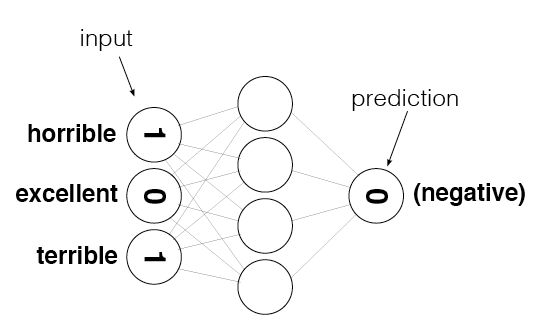

In [25]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

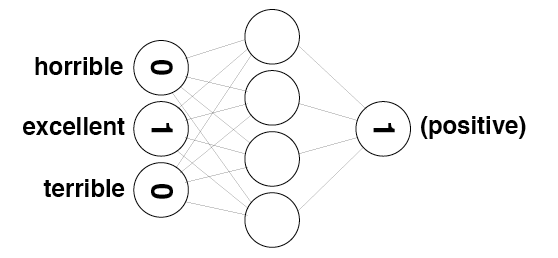

In [27]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data

In [28]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


In [29]:
list(vocab)

['',
 'zealnd',
 'psychomania',
 'focuses',
 'reluctantpopstar',
 'iwill',
 'quivering',
 'maren',
 'tess',
 'mangles',
 'stranded',
 'freshner',
 'bravo',
 'natyam',
 'celluloid',
 'beatin',
 'microscopically',
 'trudie',
 'blur',
 'cantillana',
 'coorain',
 'prison',
 'charterers',
 'melachonic',
 'watchable',
 'ghibli',
 'olsson',
 'alida',
 'default',
 'winners',
 'someday',
 'restaurant',
 'akira',
 'ducommun',
 'pasted',
 'nightshift',
 'nausica',
 'viagra',
 'vays',
 'finagling',
 'latrine',
 'katona',
 'tactless',
 'gta',
 'intercut',
 'mothra',
 'keren',
 'angsting',
 'transient',
 'conceptualized',
 'tarpon',
 'excellently',
 'hayseed',
 'makinen',
 'joaquim',
 'decked',
 'maki',
 'tibbets',
 'existences',
 'hangman',
 'behl',
 'montenegro',
 'marvellous',
 'hunts',
 'tohs',
 'devadharshini',
 'adminsitrative',
 'defecates',
 'antoniette',
 'glimpsing',
 'cratchitt',
 'scrutiny',
 'lelouch',
 'tamlyn',
 'oakie',
 'intently',
 'inversed',
 'subs',
 'inhabitant',
 'crumpled',
 

In [30]:
import numpy as np

layer_0 = np.zeros((1,vocab_size))
layer_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

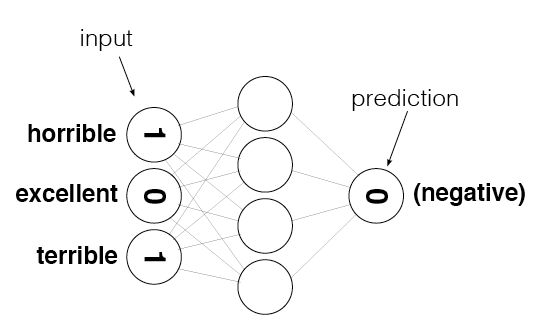

In [31]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [32]:
word2index = {}

for i,word in enumerate(vocab):
    word2index[word] = i
word2index

{'': 0,
 'zealnd': 1,
 'psychomania': 2,
 'focuses': 3,
 'iwill': 5,
 'lumbering': 62407,
 'maren': 7,
 'tess': 8,
 'stranded': 10,
 'freshner': 11,
 'natyam': 13,
 'celluloid': 14,
 'trudie': 17,
 'melachonic': 23,
 'cantillana': 19,
 'coorain': 20,
 'prison': 21,
 'charterers': 22,
 'reluctantpopstar': 4,
 'watchable': 24,
 'dillinger': 24951,
 'alida': 27,
 'default': 28,
 'winners': 29,
 'restaurant': 31,
 'akira': 32,
 'ducommun': 33,
 'pasted': 34,
 'nightshift': 35,
 'viagra': 37,
 'anthropomorphism': 24954,
 'vays': 38,
 'katona': 41,
 'flatten': 37059,
 'tactless': 42,
 'wavering': 12530,
 'gta': 43,
 'intercut': 44,
 'mothra': 45,
 'keren': 46,
 'angsting': 47,
 'transient': 48,
 'conceptualized': 49,
 'tarpon': 50,
 'excellently': 51,
 'hayseed': 52,
 'mangles': 9,
 'preserve': 57773,
 'maki': 56,
 'behl': 60,
 'hangman': 59,
 'montenegro': 61,
 'hunts': 63,
 'brink': 61699,
 'tohs': 64,
 'devadharshini': 65,
 'adminsitrative': 66,
 'upholds': 14661,
 'dinosaurs': 61700,
 'a

In [33]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [36]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

In [37]:
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [38]:
labels[0]

'POSITIVE'

In [39]:
get_target_for_label(labels[0])

1

In [40]:
labels[1]

'NEGATIVE'

In [41]:
get_target_for_label(labels[1])

0

# Project 3: Building a Neural Network

- Start with your neural network from the last chapter
- 3 layer neural network
- no non-linearity in hidden layer
- use our functions to create the training data
- create a "pre_process_data" function to create vocabulary for our training data generating functions
- modify "train" to train over the entire corpus

### Where to Get Help if You Need it
- Re-watch previous week's Udacity Lectures
- Chapters 3-5 - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) - (40% Off: **traskud17**)

In [44]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # TODO: Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # TODO: Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # TODO: Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"

In [46]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [47]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:19.8% Speed(reviews/sec):183.3% #Correct:99 #Tested:199 Testing Accuracy:49.7%

Progress:41.5% Speed(reviews/sec):320.9% #Correct:208 #Tested:416 Testing Accuracy:50.0%

Progress:60.7% Speed(reviews/sec):406.3% #Correct:304 #Tested:608 Testing Accuracy:50.0%

Progress:81.3% Speed(reviews/sec):479.9% #Correct:407 #Tested:814 Testing Accuracy:50.0%

Progress:99.9% Speed(reviews/sec):530.3% #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [62]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):89.58 #Correct:1250 #Trained:2501 Training Accuracy:49.9%
Progress:20.8% Speed(reviews/sec):95.03 #Correct:2500 #Trained:5001 Training Accuracy:49.9%
Progress:27.4% Speed(reviews/sec):95.46 #Correct:3295 #Trained:6592 Training Accuracy:49.9%

KeyboardInterrupt: 

In [63]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)

In [64]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):96.39 #Correct:1247 #Trained:2501 Training Accuracy:49.8%
Progress:20.8% Speed(reviews/sec):99.31 #Correct:2497 #Trained:5001 Training Accuracy:49.9%
Progress:22.8% Speed(reviews/sec):99.02 #Correct:2735 #Trained:5476 Training Accuracy:49.9%

KeyboardInterrupt: 

In [65]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)

In [66]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):98.77 #Correct:1267 #Trained:2501 Training Accuracy:50.6%
Progress:20.8% Speed(reviews/sec):98.79 #Correct:2640 #Trained:5001 Training Accuracy:52.7%
Progress:31.2% Speed(reviews/sec):98.58 #Correct:4109 #Trained:7501 Training Accuracy:54.7%
Progress:41.6% Speed(reviews/sec):93.78 #Correct:5638 #Trained:10001 Training Accuracy:56.3%
Progress:52.0% Speed(reviews/sec):91.76 #Correct:7246 #Trained:12501 Training Accuracy:57.9%
Progress:62.5% Speed(reviews/sec):92.42 #Correct:8841 #Trained:15001 Training Accuracy:58.9%
Progress:69.4% Speed(reviews/sec):92.58 #Correct:9934 #Trained:16668 Training Accuracy:59.5%

KeyboardInterrupt: 

# Understanding Neural Noise

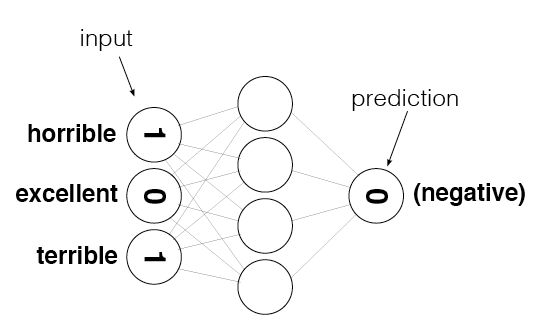

In [67]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [70]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [71]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

In [79]:
review_counter = Counter()

In [80]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

In [81]:
review_counter.most_common()

[('.', 27),
 ('', 18),
 ('the', 9),
 ('to', 6),
 ('i', 5),
 ('high', 5),
 ('is', 4),
 ('of', 4),
 ('a', 4),
 ('bromwell', 4),
 ('teachers', 4),
 ('that', 4),
 ('their', 2),
 ('my', 2),
 ('at', 2),
 ('as', 2),
 ('me', 2),
 ('in', 2),
 ('students', 2),
 ('it', 2),
 ('student', 2),
 ('school', 2),
 ('through', 1),
 ('insightful', 1),
 ('ran', 1),
 ('years', 1),
 ('here', 1),
 ('episode', 1),
 ('reality', 1),
 ('what', 1),
 ('far', 1),
 ('t', 1),
 ('saw', 1),
 ('s', 1),
 ('repeatedly', 1),
 ('isn', 1),
 ('closer', 1),
 ('and', 1),
 ('fetched', 1),
 ('remind', 1),
 ('can', 1),
 ('welcome', 1),
 ('line', 1),
 ('your', 1),
 ('survive', 1),
 ('teaching', 1),
 ('satire', 1),
 ('classic', 1),
 ('who', 1),
 ('age', 1),
 ('knew', 1),
 ('schools', 1),
 ('inspector', 1),
 ('comedy', 1),
 ('down', 1),
 ('about', 1),
 ('pity', 1),
 ('m', 1),
 ('all', 1),
 ('adults', 1),
 ('see', 1),
 ('think', 1),
 ('situation', 1),
 ('time', 1),
 ('pomp', 1),
 ('lead', 1),
 ('other', 1),
 ('much', 1),
 ('many', 1),
 

In [4]:
import time 
import sys
import numpy as np

class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes=10, learning_rate=0.1):
        #set our random generator 
        np.random.seed(1)
        self.pre_process_data(reviews, labels)
        self.init_network(len(self.review_vocab), hidden_nodes, 1, learning_rate)
        
    def pre_process_data(self, reviews, labels):
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        self.label_vocab = list(label_vocab)
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i,word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i,label in enumerate(self.label_vocab):
            self.label2index[label] = i
    
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
    def update_input_layer(self,review):
        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] = 1

    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
    
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)
            
            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###
            # TODO: Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)
            
            # TODO: Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # TODO: Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # TODO: Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # TODO: Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
                
    def run(self, review):
    
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        
    def test(self, testing_reviews, testing_labels):
    
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")

In [48]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)

In [49]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:0.08% Speed(reviews/sec):100.4 #Correct:9 #Trained:22 Training Accuracy:40.9%

Progress:0.17% Speed(reviews/sec):103.2 #Correct:16 #Trained:44 Training Accuracy:36.3%

Progress:0.27% Speed(reviews/sec):105.6 #Correct:27 #Trained:68 Training Accuracy:39.7%

Progress:0.35% Speed(reviews/sec):100.0 #Correct:35 #Trained:86 Training Accuracy:40.6%

Progress:0.43% Speed(reviews/sec):97.93 #Correct:45 #Trained:105 Training Accuracy:42.8%

Progress:0.52% Speed(reviews/sec):100.0 #Correct:56 #Trained:128 Training Accuracy:43.7%

Progress:0.62% Speed(reviews/sec):101.6 #Correct:68 #Trained:151 Training Accuracy:45.0%

Progress:0.72% Speed(reviews/sec):102.9 #Correct:79 #Trained:174 Training Accuracy:45.4%

Progress:0.81% Speed(reviews/sec):103.8 #Correct:91 #Trained:197 Training Accuracy:46.1%

Progress:0.89% Speed(reviews/sec):102.7 #Correct:100 #Trained:216 Training Accuracy:46.2%

Progress:0.98% Speed(reviews/sec):103.2 #Correct:111 #Trained:238 Training Accuracy:46.6%

Progress:1.08% Speed(reviews/sec):103.9 #Correct:123 #Trained:262 Training Accuracy:46.9%

Progress:1.18% Speed(reviews/sec):104.5 #Correct:135 #Trained:285 Training Accuracy:47.3%

Progress:1.27% Speed(reviews/sec):104.8 #Correct:146 #Trained:308 Training Accuracy:47.4%

Progress:1.37% Speed(reviews/sec):104.9 #Correct:157 #Trained:330 Training Accuracy:47.5%

Progress:1.47% Speed(reviews/sec):105.4 #Correct:170 #Trained:355 Training Accuracy:47.8%

Progress:1.57% Speed(reviews/sec):105.7 #Correct:181 #Trained:378 Training Accuracy:47.8%

Progress:1.65% Speed(reviews/sec):105.5 #Correct:192 #Trained:399 Training Accuracy:48.1%

Progress:1.75% Speed(reviews/sec):105.7 #Correct:203 #Trained:422 Training Accuracy:48.1%

Progress:1.85% Speed(reviews/sec):105.9 #Correct:215 #Trained:446 Training Accuracy:48.2%

Progress:1.95% Speed(reviews/sec):106.1 #Correct:227 #Trained:470 Training Accuracy:48.2%

Progress:2.05% Speed(reviews/sec):106.3 #Correct:239 #Trained:494 Training Accuracy:48.3%

Progress:2.12% Speed(reviews/sec):105.0 #Correct:247 #Trained:510 Training Accuracy:48.4%

Progress:2.20% Speed(reviews/sec):104.9 #Correct:258 #Trained:531 Training Accuracy:48.5%

Progress:2.3% Speed(reviews/sec):104.9 #Correct:269 #Trained:553 Training Accuracy:48.6%

Progress:2.38% Speed(reviews/sec):104.8 #Correct:279 #Trained:574 Training Accuracy:48.6%

Progress:2.48% Speed(reviews/sec):105.0 #Correct:291 #Trained:598 Training Accuracy:48.6%

Progress:2.58% Speed(reviews/sec):105.2 #Correct:303 #Trained:622 Training Accuracy:48.7%

Progress:2.67% Speed(reviews/sec):105.3 #Correct:314 #Trained:644 Training Accuracy:48.7%

Progress:2.77% Speed(reviews/sec):105.4 #Correct:326 #Trained:668 Training Accuracy:48.8%

Progress:2.85% Speed(reviews/sec):104.9 #Correct:335 #Trained:686 Training Accuracy:48.8%

Progress:2.93% Speed(reviews/sec):104.4 #Correct:345 #Trained:705 Training Accuracy:48.9%

Progress:3.00% Speed(reviews/sec):103.8 #Correct:353 #Trained:722 Training Accuracy:48.8%

Progress:3.1% Speed(reviews/sec):103.9 #Correct:365 #Trained:745 Training Accuracy:48.9%

Progress:3.19% Speed(reviews/sec):104.1 #Correct:376 #Trained:768 Training Accuracy:48.9%

Progress:3.28% Speed(reviews/sec):104.2 #Correct:387 #Trained:790 Training Accuracy:48.9%

Progress:3.37% Speed(reviews/sec):104.3 #Correct:398 #Trained:812 Training Accuracy:49.0%

Progress:3.47% Speed(reviews/sec):104.4 #Correct:409 #Trained:834 Training Accuracy:49.0%

Progress:3.55% Speed(reviews/sec):104.2 #Correct:419 #Trained:854 Training Accuracy:49.0%

Progress:3.64% Speed(reviews/sec):104.0 #Correct:430 #Trained:875 Training Accuracy:49.1%

Progress:3.72% Speed(reviews/sec):103.7 #Correct:439 #Trained:894 Training Accuracy:49.1%

Progress:3.81% Speed(reviews/sec):103.8 #Correct:450 #Trained:916 Training Accuracy:49.1%

Progress:3.90% Speed(reviews/sec):103.8 #Correct:461 #Trained:938 Training Accuracy:49.1%

Progress:3.99% Speed(reviews/sec):103.9 #Correct:472 #Trained:960 Training Accuracy:49.1%

Progress:4.08% Speed(reviews/sec):103.9 #Correct:483 #Trained:982 Training Accuracy:49.1%

Progress:4.15% Speed(reviews/sec):103.4 #Correct:492 #Trained:999 Training Accuracy:49.2%

Progress:4.22% Speed(reviews/sec):102.7 #Correct:499 #Trained:1014 Training Accuracy:49.2%

Progress:4.31% Speed(reviews/sec):102.7 #Correct:510 #Trained:1036 Training Accuracy:49.2%

Progress:4.40% Speed(reviews/sec):102.8 #Correct:522 #Trained:1059 Training Accuracy:49.2%

Progress:4.48% Speed(reviews/sec):102.4 #Correct:531 #Trained:1077 Training Accuracy:49.3%

Progress:4.55% Speed(reviews/sec):101.9 #Correct:539 #Trained:1094 Training Accuracy:49.2%

Progress:4.64% Speed(reviews/sec):101.9 #Correct:550 #Trained:1116 Training Accuracy:49.2%

Progress:4.72% Speed(reviews/sec):101.7 #Correct:559 #Trained:1134 Training Accuracy:49.2%

Progress:4.80% Speed(reviews/sec):101.6 #Correct:570 #Trained:1155 Training Accuracy:49.3%

Progress:4.88% Speed(reviews/sec):101.4 #Correct:579 #Trained:1173 Training Accuracy:49.3%

Progress:4.94% Speed(reviews/sec):100.9 #Correct:586 #Trained:1187 Training Accuracy:49.3%

Progress:5.00% Speed(reviews/sec):100.5 #Correct:594 #Trained:1203 Training Accuracy:49.3%

Progress:5.07% Speed(reviews/sec):100.1 #Correct:602 #Trained:1219 Training Accuracy:49.3%

Progress:5.16% Speed(reviews/sec):100.1 #Correct:612 #Trained:1240 Training Accuracy:49.3%

Progress:5.25% Speed(reviews/sec):100.3 #Correct:623 #Trained:1262 Training Accuracy:49.3%

Progress:5.34% Speed(reviews/sec):100.4 #Correct:634 #Trained:1284 Training Accuracy:49.3%

Progress:5.44% Speed(reviews/sec):100.5 #Correct:646 #Trained:1308 Training Accuracy:49.3%

Progress:5.54% Speed(reviews/sec):100.6 #Correct:658 #Trained:1331 Training Accuracy:49.4%

Progress:5.60% Speed(reviews/sec):100.3 #Correct:662 #Trained:1347 Training Accuracy:49.1%

Progress:5.67% Speed(reviews/sec):99.89 #Correct:670 #Trained:1362 Training Accuracy:49.1%

Progress:5.76% Speed(reviews/sec):99.97 #Correct:685 #Trained:1384 Training Accuracy:49.4%

Progress:5.85% Speed(reviews/sec):100.0 #Correct:699 #Trained:1406 Training Accuracy:49.7%

Progress:5.94% Speed(reviews/sec):100.2 #Correct:712 #Trained:1428 Training Accuracy:49.8%

Progress:6.03% Speed(reviews/sec):100.3 #Correct:722 #Trained:1450 Training Accuracy:49.7%

Progress:6.13% Speed(reviews/sec):100.4 #Correct:732 #Trained:1473 Training Accuracy:49.6%

Progress:6.21% Speed(reviews/sec):100.3 #Correct:742 #Trained:1492 Training Accuracy:49.7%

Progress:6.27% Speed(reviews/sec):99.91 #Correct:750 #Trained:1507 Training Accuracy:49.7%

Progress:6.34% Speed(reviews/sec):99.55 #Correct:758 #Trained:1523 Training Accuracy:49.7%

Progress:6.42% Speed(reviews/sec):99.57 #Correct:769 #Trained:1544 Training Accuracy:49.8%

Progress:6.52% Speed(reviews/sec):99.71 #Correct:780 #Trained:1568 Training Accuracy:49.7%

Progress:6.62% Speed(reviews/sec):99.84 #Correct:792 #Trained:1592 Training Accuracy:49.7%

Progress:6.72% Speed(reviews/sec):99.97 #Correct:803 #Trained:1616 Training Accuracy:49.6%

Progress:6.82% Speed(reviews/sec):100.0 #Correct:814 #Trained:1639 Training Accuracy:49.6%

Progress:6.91% Speed(reviews/sec):100.1 #Correct:827 #Trained:1661 Training Accuracy:49.7%

Progress:6.99% Speed(reviews/sec):100.0 #Correct:838 #Trained:1679 Training Accuracy:49.9%

Progress:7.05% Speed(reviews/sec):99.66 #Correct:844 #Trained:1694 Training Accuracy:49.8%

Progress:7.14% Speed(reviews/sec):99.66 #Correct:855 #Trained:1715 Training Accuracy:49.8%

Progress:7.23% Speed(reviews/sec):99.73 #Correct:867 #Trained:1737 Training Accuracy:49.9%

Progress:7.32% Speed(reviews/sec):99.81 #Correct:875 #Trained:1759 Training Accuracy:49.7%

Progress:7.41% Speed(reviews/sec):99.91 #Correct:885 #Trained:1781 Training Accuracy:49.6%

Progress:7.50% Speed(reviews/sec):99.99 #Correct:896 #Trained:1803 Training Accuracy:49.6%

Progress:7.6% Speed(reviews/sec):100.0 #Correct:906 #Trained:1825 Training Accuracy:49.6%

Progress:7.68% Speed(reviews/sec):100.0 #Correct:917 #Trained:1845 Training Accuracy:49.7%

Progress:7.77% Speed(reviews/sec):100.1 #Correct:928 #Trained:1867 Training Accuracy:49.7%

Progress:7.86% Speed(reviews/sec):100.2 #Correct:939 #Trained:1889 Training Accuracy:49.7%

Progress:7.95% Speed(reviews/sec):100.3 #Correct:949 #Trained:1911 Training Accuracy:49.6%

Progress:8.04% Speed(reviews/sec):100.2 #Correct:965 #Trained:1932 Training Accuracy:49.9%

Progress:8.12% Speed(reviews/sec):100.1 #Correct:974 #Trained:1952 Training Accuracy:49.8%

Progress:8.22% Speed(reviews/sec):100.1 #Correct:982 #Trained:1974 Training Accuracy:49.7%

Progress:8.31% Speed(reviews/sec):100.2 #Correct:995 #Trained:1996 Training Accuracy:49.8%

Progress:8.40% Speed(reviews/sec):100.3 #Correct:1008 #Trained:2018 Training Accuracy:49.9%

Progress:8.49% Speed(reviews/sec):100.4 #Correct:1019 #Trained:2040 Training Accuracy:49.9%

Progress:8.59% Speed(reviews/sec):100.4 #Correct:1029 #Trained:2063 Training Accuracy:49.8%

Progress:8.68% Speed(reviews/sec):100.5 #Correct:1044 #Trained:2085 Training Accuracy:50.0%

Progress:8.77% Speed(reviews/sec):100.5 #Correct:1055 #Trained:2108 Training Accuracy:50.0%

Progress:8.85% Speed(reviews/sec):100.3 #Correct:1060 #Trained:2125 Training Accuracy:49.8%

Progress:8.93% Speed(reviews/sec):100.2 #Correct:1068 #Trained:2145 Training Accuracy:49.7%

Progress:9.02% Speed(reviews/sec):100.3 #Correct:1082 #Trained:2167 Training Accuracy:49.9%

Progress:9.11% Speed(reviews/sec):100.4 #Correct:1093 #Trained:2189 Training Accuracy:49.9%

Progress:9.18% Speed(reviews/sec):100.2 #Correct:1102 #Trained:2205 Training Accuracy:49.9%

Progress:9.26% Speed(reviews/sec):100.0 #Correct:1114 #Trained:2224 Training Accuracy:50.0%

Progress:9.35% Speed(reviews/sec):100.0 #Correct:1123 #Trained:2245 Training Accuracy:50.0%

Progress:9.44% Speed(reviews/sec):100.1 #Correct:1134 #Trained:2268 Training Accuracy:50.0%

Progress:9.53% Speed(reviews/sec):100.2 #Correct:1145 #Trained:2290 Training Accuracy:50.0%

Progress:9.63% Speed(reviews/sec):100.2 #Correct:1156 #Trained:2313 Training Accuracy:49.9%

Progress:9.72% Speed(reviews/sec):100.2 #Correct:1166 #Trained:2334 Training Accuracy:49.9%

Progress:9.80% Speed(reviews/sec):100.2 #Correct:1177 #Trained:2355 Training Accuracy:49.9%

Progress:9.9% Speed(reviews/sec):100.3 #Correct:1188 #Trained:2377 Training Accuracy:49.9%

Progress:9.99% Speed(reviews/sec):100.4 #Correct:1200 #Trained:2399 Training Accuracy:50.0%

Progress:10.0% Speed(reviews/sec):100.4 #Correct:1212 #Trained:2422 Training Accuracy:50.0%

Progress:10.1% Speed(reviews/sec):100.3 #Correct:1220 #Trained:2439 Training Accuracy:50.0%

Progress:10.2% Speed(reviews/sec):100.3 #Correct:1232 #Trained:2460 Training Accuracy:50.0%

Progress:10.3% Speed(reviews/sec):100.4 #Correct:1251 #Trained:2482 Training Accuracy:50.4%

Progress:10.4% Speed(reviews/sec):100.3 #Correct:1264 #Trained:2500 Training Accuracy:50.5%

Progress:10.4% Speed(reviews/sec):100.3 #Correct:1264 #Trained:2501 Training Accuracy:50.5%
Progress:10.4% Speed(reviews/sec):100.1 #Correct:1272 #Trained:2517 Training Accuracy:50.5%

Progress:10.5% Speed(reviews/sec):100.2 #Correct:1282 #Trained:2538 Training Accuracy:50.5%

Progress:10.6% Speed(reviews/sec):100.2 #Correct:1293 #Trained:2559 Training Accuracy:50.5%

Progress:10.7% Speed(reviews/sec):100.2 #Correct:1301 #Trained:2580 Training Accuracy:50.4%

Progress:10.8% Speed(reviews/sec):100.2 #Correct:1312 #Trained:2601 Training Accuracy:50.4%

Progress:10.9% Speed(reviews/sec):100.1 #Correct:1322 #Trained:2621 Training Accuracy:50.4%

Progress:11.0% Speed(reviews/sec):100.2 #Correct:1333 #Trained:2643 Training Accuracy:50.4%

Progress:11.0% Speed(reviews/sec):100.2 #Correct:1343 #Trained:2664 Training Accuracy:50.4%

Progress:11.1% Speed(reviews/sec):100.2 #Correct:1354 #Trained:2686 Training Accuracy:50.4%

Progress:11.2% Speed(reviews/sec):100.3 #Correct:1366 #Trained:2709 Training Accuracy:50.4%

Progress:11.3% Speed(reviews/sec):100.2 #Correct:1374 #Trained:2726 Training Accuracy:50.4%

Progress:11.3% Speed(reviews/sec):99.60 #Correct:1377 #Trained:2732 Training Accuracy:50.4%

Progress:11.4% Speed(reviews/sec):99.24 #Correct:1384 #Trained:2746 Training Accuracy:50.4%

Progress:11.5% Speed(reviews/sec):99.12 #Correct:1393 #Trained:2763 Training Accuracy:50.4%

Progress:11.6% Speed(reviews/sec):99.11 #Correct:1407 #Trained:2785 Training Accuracy:50.5%

Progress:11.6% Speed(reviews/sec):99.12 #Correct:1417 #Trained:2805 Training Accuracy:50.5%

Progress:11.7% Speed(reviews/sec):99.11 #Correct:1428 #Trained:2825 Training Accuracy:50.5%

Progress:11.8% Speed(reviews/sec):99.09 #Correct:1440 #Trained:2845 Training Accuracy:50.6%

Progress:11.9% Speed(reviews/sec):99.08 #Correct:1454 #Trained:2865 Training Accuracy:50.7%

Progress:11.9% Speed(reviews/sec):98.71 #Correct:1461 #Trained:2875 Training Accuracy:50.8%

Progress:12.0% Speed(reviews/sec):98.29 #Correct:1465 #Trained:2885 Training Accuracy:50.7%

Progress:12.1% Speed(reviews/sec):98.31 #Correct:1475 #Trained:2906 Training Accuracy:50.7%

Progress:12.1% Speed(reviews/sec):98.34 #Correct:1489 #Trained:2927 Training Accuracy:50.8%

Progress:12.2% Speed(reviews/sec):98.39 #Correct:1501 #Trained:2949 Training Accuracy:50.8%

Progress:12.3% Speed(reviews/sec):98.41 #Correct:1512 #Trained:2971 Training Accuracy:50.8%

Progress:12.4% Speed(reviews/sec):98.43 #Correct:1522 #Trained:2992 Training Accuracy:50.8%

Progress:12.5% Speed(reviews/sec):98.44 #Correct:1532 #Trained:3013 Training Accuracy:50.8%

Progress:12.6% Speed(reviews/sec):98.30 #Correct:1541 #Trained:3029 Training Accuracy:50.8%

Progress:12.6% Speed(reviews/sec):98.20 #Correct:1551 #Trained:3047 Training Accuracy:50.9%

Progress:12.7% Speed(reviews/sec):98.26 #Correct:1563 #Trained:3069 Training Accuracy:50.9%

Progress:12.8% Speed(reviews/sec):98.11 #Correct:1570 #Trained:3084 Training Accuracy:50.9%

Progress:12.9% Speed(reviews/sec):98.11 #Correct:1580 #Trained:3105 Training Accuracy:50.8%

Progress:13.0% Speed(reviews/sec):98.15 #Correct:1594 #Trained:3127 Training Accuracy:50.9%

Progress:13.1% Speed(reviews/sec):98.11 #Correct:1605 #Trained:3146 Training Accuracy:51.0%

Progress:13.1% Speed(reviews/sec):97.92 #Correct:1614 #Trained:3161 Training Accuracy:51.0%

Progress:13.2% Speed(reviews/sec):97.89 #Correct:1624 #Trained:3181 Training Accuracy:51.0%

Progress:13.3% Speed(reviews/sec):97.81 #Correct:1631 #Trained:3199 Training Accuracy:50.9%

Progress:13.3% Speed(reviews/sec):97.65 #Correct:1638 #Trained:3214 Training Accuracy:50.9%

Progress:13.4% Speed(reviews/sec):97.56 #Correct:1650 #Trained:3231 Training Accuracy:51.0%

Progress:13.5% Speed(reviews/sec):97.40 #Correct:1662 #Trained:3246 Training Accuracy:51.2%

Progress:13.6% Speed(reviews/sec):97.39 #Correct:1674 #Trained:3266 Training Accuracy:51.2%

Progress:13.6% Speed(reviews/sec):97.36 #Correct:1686 #Trained:3287 Training Accuracy:51.2%

Progress:13.7% Speed(reviews/sec):97.31 #Correct:1696 #Trained:3306 Training Accuracy:51.3%

Progress:13.8% Speed(reviews/sec):97.22 #Correct:1704 #Trained:3323 Training Accuracy:51.2%

Progress:13.9% Speed(reviews/sec):97.23 #Correct:1714 #Trained:3344 Training Accuracy:51.2%

Progress:14.0% Speed(reviews/sec):97.29 #Correct:1725 #Trained:3366 Training Accuracy:51.2%

Progress:14.1% Speed(reviews/sec):97.32 #Correct:1735 #Trained:3387 Training Accuracy:51.2%

Progress:14.1% Speed(reviews/sec):97.35 #Correct:1745 #Trained:3408 Training Accuracy:51.2%

Progress:14.2% Speed(reviews/sec):97.35 #Correct:1755 #Trained:3429 Training Accuracy:51.1%

Progress:14.3% Speed(reviews/sec):97.30 #Correct:1765 #Trained:3449 Training Accuracy:51.1%

Progress:14.4% Speed(reviews/sec):97.34 #Correct:1776 #Trained:3471 Training Accuracy:51.1%

Progress:14.5% Speed(reviews/sec):97.35 #Correct:1785 #Trained:3491 Training Accuracy:51.1%

Progress:14.6% Speed(reviews/sec):97.37 #Correct:1796 #Trained:3512 Training Accuracy:51.1%

Progress:14.7% Speed(reviews/sec):97.38 #Correct:1807 #Trained:3534 Training Accuracy:51.1%

Progress:14.7% Speed(reviews/sec):97.31 #Correct:1818 #Trained:3552 Training Accuracy:51.1%

Progress:14.8% Speed(reviews/sec):97.38 #Correct:1828 #Trained:3574 Training Accuracy:51.1%

Progress:14.9% Speed(reviews/sec):97.28 #Correct:1838 #Trained:3591 Training Accuracy:51.1%

Progress:15.0% Speed(reviews/sec):97.35 #Correct:1848 #Trained:3615 Training Accuracy:51.1%

Progress:15.1% Speed(reviews/sec):97.40 #Correct:1862 #Trained:3637 Training Accuracy:51.1%

Progress:15.2% Speed(reviews/sec):97.42 #Correct:1870 #Trained:3658 Training Accuracy:51.1%

Progress:15.3% Speed(reviews/sec):97.46 #Correct:1881 #Trained:3680 Training Accuracy:51.1%

Progress:15.4% Speed(reviews/sec):97.37 #Correct:1895 #Trained:3698 Training Accuracy:51.2%

Progress:15.4% Speed(reviews/sec):97.39 #Correct:1908 #Trained:3719 Training Accuracy:51.3%

Progress:15.5% Speed(reviews/sec):97.31 #Correct:1916 #Trained:3736 Training Accuracy:51.2%

Progress:15.6% Speed(reviews/sec):97.34 #Correct:1925 #Trained:3758 Training Accuracy:51.2%

Progress:15.7% Speed(reviews/sec):97.29 #Correct:1932 #Trained:3776 Training Accuracy:51.1%

Progress:15.8% Speed(reviews/sec):97.32 #Correct:1943 #Trained:3797 Training Accuracy:51.1%

Progress:15.8% Speed(reviews/sec):97.23 #Correct:1952 #Trained:3813 Training Accuracy:51.1%

Progress:15.9% Speed(reviews/sec):97.20 #Correct:1964 #Trained:3832 Training Accuracy:51.2%

Progress:16.0% Speed(reviews/sec):97.05 #Correct:1971 #Trained:3848 Training Accuracy:51.2%

Progress:16.0% Speed(reviews/sec):96.93 #Correct:1977 #Trained:3864 Training Accuracy:51.1%

Progress:16.1% Speed(reviews/sec):96.80 #Correct:1987 #Trained:3879 Training Accuracy:51.2%

Progress:16.2% Speed(reviews/sec):96.78 #Correct:1997 #Trained:3899 Training Accuracy:51.2%

Progress:16.3% Speed(reviews/sec):96.80 #Correct:2009 #Trained:3921 Training Accuracy:51.2%

Progress:16.4% Speed(reviews/sec):96.82 #Correct:2020 #Trained:3943 Training Accuracy:51.2%

Progress:16.5% Speed(reviews/sec):96.84 #Correct:2030 #Trained:3963 Training Accuracy:51.2%

Progress:16.5% Speed(reviews/sec):96.86 #Correct:2044 #Trained:3984 Training Accuracy:51.3%

Progress:16.6% Speed(reviews/sec):96.88 #Correct:2054 #Trained:4006 Training Accuracy:51.2%

Progress:16.7% Speed(reviews/sec):96.77 #Correct:2063 #Trained:4021 Training Accuracy:51.3%

Progress:16.8% Speed(reviews/sec):96.65 #Correct:2070 #Trained:4037 Training Accuracy:51.2%

Progress:16.8% Speed(reviews/sec):96.54 #Correct:2076 #Trained:4052 Training Accuracy:51.2%

Progress:16.9% Speed(reviews/sec):96.40 #Correct:2082 #Trained:4066 Training Accuracy:51.2%

Progress:17.0% Speed(reviews/sec):96.30 #Correct:2090 #Trained:4082 Training Accuracy:51.2%

Progress:17.0% Speed(reviews/sec):96.32 #Correct:2101 #Trained:4103 Training Accuracy:51.2%

Progress:17.1% Speed(reviews/sec):96.37 #Correct:2112 #Trained:4125 Training Accuracy:51.2%

Progress:17.2% Speed(reviews/sec):96.34 #Correct:2121 #Trained:4144 Training Accuracy:51.1%

Progress:17.3% Speed(reviews/sec):96.30 #Correct:2130 #Trained:4162 Training Accuracy:51.1%

Progress:17.4% Speed(reviews/sec):96.33 #Correct:2141 #Trained:4183 Training Accuracy:51.1%

Progress:17.5% Speed(reviews/sec):96.38 #Correct:2152 #Trained:4205 Training Accuracy:51.1%

Progress:17.6% Speed(reviews/sec):96.40 #Correct:2162 #Trained:4226 Training Accuracy:51.1%

Progress:17.6% Speed(reviews/sec):96.33 #Correct:2171 #Trained:4243 Training Accuracy:51.1%

Progress:17.7% Speed(reviews/sec):96.38 #Correct:2184 #Trained:4265 Training Accuracy:51.2%

Progress:17.8% Speed(reviews/sec):96.42 #Correct:2196 #Trained:4287 Training Accuracy:51.2%

Progress:17.9% Speed(reviews/sec):96.46 #Correct:2210 #Trained:4310 Training Accuracy:51.2%

Progress:18.0% Speed(reviews/sec):96.49 #Correct:2220 #Trained:4332 Training Accuracy:51.2%

Progress:18.1% Speed(reviews/sec):96.50 #Correct:2237 #Trained:4353 Training Accuracy:51.3%

Progress:18.1% Speed(reviews/sec):96.38 #Correct:2245 #Trained:4368 Training Accuracy:51.3%

Progress:18.2% Speed(reviews/sec):96.28 #Correct:2254 #Trained:4385 Training Accuracy:51.4%

Progress:18.3% Speed(reviews/sec):96.31 #Correct:2266 #Trained:4406 Training Accuracy:51.4%

Progress:18.4% Speed(reviews/sec):96.33 #Correct:2279 #Trained:4427 Training Accuracy:51.4%

Progress:18.5% Speed(reviews/sec):96.37 #Correct:2292 #Trained:4449 Training Accuracy:51.5%

Progress:18.6% Speed(reviews/sec):96.41 #Correct:2305 #Trained:4471 Training Accuracy:51.5%

Progress:18.7% Speed(reviews/sec):96.47 #Correct:2317 #Trained:4494 Training Accuracy:51.5%

Progress:18.8% Speed(reviews/sec):96.53 #Correct:2332 #Trained:4517 Training Accuracy:51.6%

Progress:18.9% Speed(reviews/sec):96.59 #Correct:2346 #Trained:4540 Training Accuracy:51.6%

Progress:19.0% Speed(reviews/sec):96.63 #Correct:2357 #Trained:4562 Training Accuracy:51.6%

Progress:19.0% Speed(reviews/sec):96.67 #Correct:2368 #Trained:4584 Training Accuracy:51.6%

Progress:19.1% Speed(reviews/sec):96.71 #Correct:2379 #Trained:4606 Training Accuracy:51.6%

Progress:19.2% Speed(reviews/sec):96.75 #Correct:2395 #Trained:4628 Training Accuracy:51.7%

Progress:19.3% Speed(reviews/sec):96.79 #Correct:2410 #Trained:4650 Training Accuracy:51.8%

Progress:19.4% Speed(reviews/sec):96.82 #Correct:2424 #Trained:4672 Training Accuracy:51.8%

Progress:19.5% Speed(reviews/sec):96.81 #Correct:2436 #Trained:4693 Training Accuracy:51.9%

Progress:19.6% Speed(reviews/sec):96.87 #Correct:2450 #Trained:4717 Training Accuracy:51.9%

Progress:19.7% Speed(reviews/sec):96.80 #Correct:2458 #Trained:4734 Training Accuracy:51.9%

Progress:19.7% Speed(reviews/sec):96.68 #Correct:2464 #Trained:4748 Training Accuracy:51.8%

Progress:19.8% Speed(reviews/sec):96.54 #Correct:2474 #Trained:4762 Training Accuracy:51.9%

Progress:19.9% Speed(reviews/sec):96.46 #Correct:2484 #Trained:4778 Training Accuracy:51.9%

Progress:19.9% Speed(reviews/sec):96.34 #Correct:2491 #Trained:4793 Training Accuracy:51.9%

Progress:20.0% Speed(reviews/sec):96.23 #Correct:2498 #Trained:4808 Training Accuracy:51.9%

Progress:20.0% Speed(reviews/sec):96.11 #Correct:2508 #Trained:4822 Training Accuracy:52.0%

Progress:20.1% Speed(reviews/sec):95.98 #Correct:2516 #Trained:4836 Training Accuracy:52.0%

Progress:20.2% Speed(reviews/sec):95.85 #Correct:2523 #Trained:4850 Training Accuracy:52.0%

Progress:20.2% Speed(reviews/sec):95.73 #Correct:2534 #Trained:4864 Training Accuracy:52.0%

Progress:20.3% Speed(reviews/sec):95.63 #Correct:2542 #Trained:4879 Training Accuracy:52.1%

Progress:20.3% Speed(reviews/sec):95.52 #Correct:2551 #Trained:4895 Training Accuracy:52.1%

Progress:20.4% Speed(reviews/sec):95.50 #Correct:2562 #Trained:4915 Training Accuracy:52.1%

Progress:20.5% Speed(reviews/sec):95.51 #Correct:2574 #Trained:4935 Training Accuracy:52.1%

Progress:20.6% Speed(reviews/sec):95.53 #Correct:2585 #Trained:4956 Training Accuracy:52.1%

Progress:20.7% Speed(reviews/sec):95.54 #Correct:2594 #Trained:4976 Training Accuracy:52.1%

Progress:20.8% Speed(reviews/sec):95.56 #Correct:2605 #Trained:4997 Training Accuracy:52.1%

Progress:20.8% Speed(reviews/sec):95.55 #Correct:2607 #Trained:5001 Training Accuracy:52.1%
Progress:20.9% Speed(reviews/sec):95.58 #Correct:2617 #Trained:5018 Training Accuracy:52.1%

Progress:20.9% Speed(reviews/sec):95.59 #Correct:2633 #Trained:5038 Training Accuracy:52.2%

Progress:21.0% Speed(reviews/sec):95.61 #Correct:2643 #Trained:5059 Training Accuracy:52.2%

Progress:21.1% Speed(reviews/sec):95.64 #Correct:2654 #Trained:5081 Training Accuracy:52.2%

Progress:21.2% Speed(reviews/sec):95.68 #Correct:2666 #Trained:5103 Training Accuracy:52.2%

Progress:21.3% Speed(reviews/sec):95.63 #Correct:2674 #Trained:5120 Training Accuracy:52.2%

Progress:21.3% Speed(reviews/sec):95.55 #Correct:2680 #Trained:5136 Training Accuracy:52.1%

Progress:21.4% Speed(reviews/sec):95.47 #Correct:2689 #Trained:5152 Training Accuracy:52.1%

Progress:21.5% Speed(reviews/sec):95.42 #Correct:2698 #Trained:5169 Training Accuracy:52.1%

Progress:21.6% Speed(reviews/sec):95.43 #Correct:2709 #Trained:5189 Training Accuracy:52.2%

Progress:21.7% Speed(reviews/sec):95.47 #Correct:2722 #Trained:5211 Training Accuracy:52.2%

Progress:21.8% Speed(reviews/sec):95.50 #Correct:2737 #Trained:5234 Training Accuracy:52.2%

Progress:21.8% Speed(reviews/sec):95.52 #Correct:2752 #Trained:5255 Training Accuracy:52.3%

Progress:21.9% Speed(reviews/sec):95.51 #Correct:2767 #Trained:5275 Training Accuracy:52.4%

Progress:22.0% Speed(reviews/sec):95.53 #Correct:2779 #Trained:5296 Training Accuracy:52.4%

Progress:22.1% Speed(reviews/sec):95.55 #Correct:2793 #Trained:5317 Training Accuracy:52.5%

Progress:22.2% Speed(reviews/sec):95.60 #Correct:2811 #Trained:5340 Training Accuracy:52.6%

Progress:22.3% Speed(reviews/sec):95.63 #Correct:2824 #Trained:5362 Training Accuracy:52.6%

Progress:22.4% Speed(reviews/sec):95.67 #Correct:2838 #Trained:5384 Training Accuracy:52.7%

Progress:22.5% Speed(reviews/sec):95.69 #Correct:2849 #Trained:5405 Training Accuracy:52.7%

Progress:22.6% Speed(reviews/sec):95.72 #Correct:2859 #Trained:5426 Training Accuracy:52.6%

Progress:22.6% Speed(reviews/sec):95.76 #Correct:2869 #Trained:5448 Training Accuracy:52.6%

Progress:22.7% Speed(reviews/sec):95.80 #Correct:2879 #Trained:5470 Training Accuracy:52.6%

Progress:22.8% Speed(reviews/sec):95.84 #Correct:2893 #Trained:5492 Training Accuracy:52.6%

Progress:22.9% Speed(reviews/sec):95.86 #Correct:2905 #Trained:5514 Training Accuracy:52.6%

Progress:23.0% Speed(reviews/sec):95.89 #Correct:2920 #Trained:5537 Training Accuracy:52.7%

Progress:23.1% Speed(reviews/sec):95.86 #Correct:2931 #Trained:5555 Training Accuracy:52.7%

Progress:23.2% Speed(reviews/sec):95.83 #Correct:2940 #Trained:5573 Training Accuracy:52.7%

Progress:23.2% Speed(reviews/sec):95.82 #Correct:2952 #Trained:5592 Training Accuracy:52.7%

Progress:23.3% Speed(reviews/sec):95.84 #Correct:2965 #Trained:5613 Training Accuracy:52.8%

Progress:23.4% Speed(reviews/sec):95.84 #Correct:2976 #Trained:5633 Training Accuracy:52.8%

Progress:23.5% Speed(reviews/sec):95.87 #Correct:2985 #Trained:5655 Training Accuracy:52.7%

Progress:23.6% Speed(reviews/sec):95.90 #Correct:2994 #Trained:5676 Training Accuracy:52.7%

Progress:23.7% Speed(reviews/sec):95.91 #Correct:3004 #Trained:5697 Training Accuracy:52.7%

Progress:23.8% Speed(reviews/sec):95.93 #Correct:3014 #Trained:5719 Training Accuracy:52.7%

Progress:23.9% Speed(reviews/sec):95.96 #Correct:3024 #Trained:5742 Training Accuracy:52.6%

Progress:24.0% Speed(reviews/sec):95.97 #Correct:3038 #Trained:5763 Training Accuracy:52.7%

Progress:24.0% Speed(reviews/sec):95.98 #Correct:3051 #Trained:5784 Training Accuracy:52.7%

Progress:24.1% Speed(reviews/sec):95.98 #Correct:3061 #Trained:5804 Training Accuracy:52.7%

Progress:24.2% Speed(reviews/sec):96.01 #Correct:3070 #Trained:5825 Training Accuracy:52.7%

Progress:24.3% Speed(reviews/sec):96.03 #Correct:3083 #Trained:5846 Training Accuracy:52.7%

Progress:24.4% Speed(reviews/sec):96.00 #Correct:3095 #Trained:5866 Training Accuracy:52.7%

Progress:24.5% Speed(reviews/sec):95.97 #Correct:3102 #Trained:5884 Training Accuracy:52.7%

Progress:24.5% Speed(reviews/sec):95.98 #Correct:3112 #Trained:5904 Training Accuracy:52.7%

Progress:24.6% Speed(reviews/sec):95.98 #Correct:3124 #Trained:5925 Training Accuracy:52.7%

Progress:24.7% Speed(reviews/sec):95.99 #Correct:3135 #Trained:5946 Training Accuracy:52.7%

Progress:24.8% Speed(reviews/sec):96.01 #Correct:3145 #Trained:5967 Training Accuracy:52.7%

Progress:24.9% Speed(reviews/sec):96.00 #Correct:3158 #Trained:5987 Training Accuracy:52.7%

Progress:25.0% Speed(reviews/sec):96.00 #Correct:3172 #Trained:6009 Training Accuracy:52.7%

Progress:25.1% Speed(reviews/sec):96.00 #Correct:3184 #Trained:6029 Training Accuracy:52.8%

Progress:25.2% Speed(reviews/sec):96.01 #Correct:3194 #Trained:6051 Training Accuracy:52.7%

Progress:25.2% Speed(reviews/sec):96.02 #Correct:3203 #Trained:6072 Training Accuracy:52.7%

Progress:25.3% Speed(reviews/sec):96.03 #Correct:3216 #Trained:6092 Training Accuracy:52.7%

Progress:25.4% Speed(reviews/sec):95.98 #Correct:3229 #Trained:6109 Training Accuracy:52.8%

Progress:25.5% Speed(reviews/sec):95.96 #Correct:3239 #Trained:6128 Training Accuracy:52.8%

Progress:25.6% Speed(reviews/sec):95.97 #Correct:3252 #Trained:6149 Training Accuracy:52.8%

Progress:25.7% Speed(reviews/sec):95.98 #Correct:3269 #Trained:6170 Training Accuracy:52.9%

Progress:25.7% Speed(reviews/sec):96.00 #Correct:3282 #Trained:6192 Training Accuracy:53.0%

Progress:25.8% Speed(reviews/sec):96.01 #Correct:3295 #Trained:6212 Training Accuracy:53.0%

Progress:25.9% Speed(reviews/sec):96.00 #Correct:3309 #Trained:6231 Training Accuracy:53.1%

Progress:26.0% Speed(reviews/sec):95.93 #Correct:3316 #Trained:6246 Training Accuracy:53.0%

Progress:26.0% Speed(reviews/sec):95.84 #Correct:3329 #Trained:6262 Training Accuracy:53.1%

Progress:26.1% Speed(reviews/sec):95.75 #Correct:3339 #Trained:6277 Training Accuracy:53.1%

Progress:26.2% Speed(reviews/sec):95.67 #Correct:3350 #Trained:6292 Training Accuracy:53.2%

Progress:26.3% Speed(reviews/sec):95.69 #Correct:3364 #Trained:6314 Training Accuracy:53.2%

Progress:26.3% Speed(reviews/sec):95.72 #Correct:3377 #Trained:6336 Training Accuracy:53.2%

Progress:26.4% Speed(reviews/sec):95.70 #Correct:3389 #Trained:6356 Training Accuracy:53.3%

Progress:26.5% Speed(reviews/sec):95.61 #Correct:3397 #Trained:6370 Training Accuracy:53.3%

Progress:26.6% Speed(reviews/sec):95.56 #Correct:3407 #Trained:6386 Training Accuracy:53.3%

Progress:26.6% Speed(reviews/sec):95.53 #Correct:3415 #Trained:6405 Training Accuracy:53.3%

Progress:26.7% Speed(reviews/sec):95.56 #Correct:3429 #Trained:6427 Training Accuracy:53.3%

Progress:26.8% Speed(reviews/sec):95.59 #Correct:3439 #Trained:6450 Training Accuracy:53.3%

Progress:26.9% Speed(reviews/sec):95.57 #Correct:3450 #Trained:6469 Training Accuracy:53.3%

Progress:27.0% Speed(reviews/sec):95.49 #Correct:3457 #Trained:6484 Training Accuracy:53.3%

Progress:27.0% Speed(reviews/sec):95.42 #Correct:3469 #Trained:6499 Training Accuracy:53.3%

Progress:27.1% Speed(reviews/sec):95.34 #Correct:3479 #Trained:6513 Training Accuracy:53.4%

Progress:27.2% Speed(reviews/sec):95.27 #Correct:3486 #Trained:6529 Training Accuracy:53.3%

Progress:27.2% Speed(reviews/sec):95.20 #Correct:3495 #Trained:6544 Training Accuracy:53.4%

Progress:27.3% Speed(reviews/sec):95.13 #Correct:3504 #Trained:6560 Training Accuracy:53.4%

Progress:27.3% Speed(reviews/sec):95.06 #Correct:3512 #Trained:6576 Training Accuracy:53.4%

Progress:27.4% Speed(reviews/sec):94.97 #Correct:3519 #Trained:6591 Training Accuracy:53.3%

Progress:27.5% Speed(reviews/sec):94.96 #Correct:3531 #Trained:6611 Training Accuracy:53.4%

Progress:27.6% Speed(reviews/sec):94.96 #Correct:3542 #Trained:6632 Training Accuracy:53.4%

Progress:27.7% Speed(reviews/sec):94.95 #Correct:3554 #Trained:6651 Training Accuracy:53.4%

Progress:27.7% Speed(reviews/sec):94.96 #Correct:3566 #Trained:6672 Training Accuracy:53.4%

Progress:27.8% Speed(reviews/sec):94.95 #Correct:3578 #Trained:6692 Training Accuracy:53.4%

Progress:27.9% Speed(reviews/sec):94.97 #Correct:3591 #Trained:6714 Training Accuracy:53.4%

Progress:28.0% Speed(reviews/sec):94.99 #Correct:3602 #Trained:6735 Training Accuracy:53.4%

Progress:28.1% Speed(reviews/sec):95.01 #Correct:3617 #Trained:6756 Training Accuracy:53.5%

Progress:28.2% Speed(reviews/sec):95.03 #Correct:3631 #Trained:6777 Training Accuracy:53.5%

Progress:28.3% Speed(reviews/sec):95.04 #Correct:3640 #Trained:6797 Training Accuracy:53.5%

Progress:28.4% Speed(reviews/sec):95.04 #Correct:3651 #Trained:6817 Training Accuracy:53.5%

Progress:28.4% Speed(reviews/sec):95.03 #Correct:3660 #Trained:6836 Training Accuracy:53.5%

Progress:28.5% Speed(reviews/sec):95.06 #Correct:3676 #Trained:6858 Training Accuracy:53.6%

Progress:28.6% Speed(reviews/sec):95.05 #Correct:3689 #Trained:6877 Training Accuracy:53.6%

Progress:28.7% Speed(reviews/sec):95.06 #Correct:3705 #Trained:6897 Training Accuracy:53.7%

Progress:28.8% Speed(reviews/sec):95.05 #Correct:3716 #Trained:6917 Training Accuracy:53.7%

Progress:28.8% Speed(reviews/sec):95.06 #Correct:3728 #Trained:6936 Training Accuracy:53.7%

Progress:28.9% Speed(reviews/sec):94.98 #Correct:3735 #Trained:6951 Training Accuracy:53.7%

Progress:29.0% Speed(reviews/sec):94.94 #Correct:3747 #Trained:6967 Training Accuracy:53.7%

Progress:29.1% Speed(reviews/sec):94.94 #Correct:3761 #Trained:6987 Training Accuracy:53.8%

Progress:29.1% Speed(reviews/sec):94.94 #Correct:3779 #Trained:7008 Training Accuracy:53.9%

Progress:29.2% Speed(reviews/sec):94.96 #Correct:3795 #Trained:7030 Training Accuracy:53.9%

Progress:29.3% Speed(reviews/sec):94.93 #Correct:3806 #Trained:7047 Training Accuracy:54.0%

Progress:29.4% Speed(reviews/sec):94.89 #Correct:3814 #Trained:7063 Training Accuracy:53.9%

Progress:29.5% Speed(reviews/sec):94.89 #Correct:3824 #Trained:7083 Training Accuracy:53.9%

Progress:29.5% Speed(reviews/sec):94.84 #Correct:3835 #Trained:7099 Training Accuracy:54.0%

Progress:29.6% Speed(reviews/sec):94.76 #Correct:3841 #Trained:7113 Training Accuracy:53.9%

Progress:29.7% Speed(reviews/sec):94.74 #Correct:3849 #Trained:7133 Training Accuracy:53.9%

Progress:29.7% Speed(reviews/sec):94.66 #Correct:3856 #Trained:7147 Training Accuracy:53.9%

Progress:29.8% Speed(reviews/sec):94.59 #Correct:3862 #Trained:7161 Training Accuracy:53.9%

Progress:29.9% Speed(reviews/sec):94.57 #Correct:3874 #Trained:7179 Training Accuracy:53.9%

Progress:29.9% Speed(reviews/sec):94.55 #Correct:3890 #Trained:7197 Training Accuracy:54.0%

Progress:30.0% Speed(reviews/sec):94.54 #Correct:3902 #Trained:7217 Training Accuracy:54.0%

Progress:30.1% Speed(reviews/sec):94.50 #Correct:3910 #Trained:7234 Training Accuracy:54.0%

Progress:30.2% Speed(reviews/sec):94.43 #Correct:3918 #Trained:7250 Training Accuracy:54.0%

Progress:30.2% Speed(reviews/sec):94.38 #Correct:3926 #Trained:7266 Training Accuracy:54.0%

Progress:30.3% Speed(reviews/sec):94.31 #Correct:3934 #Trained:7281 Training Accuracy:54.0%

Progress:30.4% Speed(reviews/sec):94.29 #Correct:3943 #Trained:7299 Training Accuracy:54.0%

Progress:30.4% Speed(reviews/sec):94.24 #Correct:3951 #Trained:7315 Training Accuracy:54.0%

Progress:30.5% Speed(reviews/sec):94.22 #Correct:3960 #Trained:7333 Training Accuracy:54.0%

Progress:30.6% Speed(reviews/sec):94.19 #Correct:3968 #Trained:7350 Training Accuracy:53.9%

Progress:30.7% Speed(reviews/sec):94.20 #Correct:3979 #Trained:7371 Training Accuracy:53.9%

Progress:30.7% Speed(reviews/sec):94.18 #Correct:3988 #Trained:7389 Training Accuracy:53.9%

Progress:30.8% Speed(reviews/sec):94.20 #Correct:3998 #Trained:7410 Training Accuracy:53.9%

Progress:30.9% Speed(reviews/sec):94.23 #Correct:4009 #Trained:7431 Training Accuracy:53.9%

Progress:31.0% Speed(reviews/sec):94.22 #Correct:4018 #Trained:7450 Training Accuracy:53.9%

Progress:31.1% Speed(reviews/sec):94.25 #Correct:4029 #Trained:7472 Training Accuracy:53.9%

Progress:31.2% Speed(reviews/sec):94.24 #Correct:4039 #Trained:7491 Training Accuracy:53.9%

Progress:31.2% Speed(reviews/sec):94.23 #Correct:4044 #Trained:7501 Training Accuracy:53.9%
Progress:31.2% Speed(reviews/sec):94.25 #Correct:4049 #Trained:7511 Training Accuracy:53.9%

Progress:31.3% Speed(reviews/sec):94.28 #Correct:4060 #Trained:7533 Training Accuracy:53.8%

Progress:31.4% Speed(reviews/sec):94.31 #Correct:4071 #Trained:7555 Training Accuracy:53.8%

Progress:31.5% Speed(reviews/sec):94.32 #Correct:4081 #Trained:7575 Training Accuracy:53.8%

Progress:31.6% Speed(reviews/sec):94.34 #Correct:4091 #Trained:7596 Training Accuracy:53.8%

Progress:31.7% Speed(reviews/sec):94.36 #Correct:4102 #Trained:7618 Training Accuracy:53.8%

Progress:31.8% Speed(reviews/sec):94.39 #Correct:4113 #Trained:7640 Training Accuracy:53.8%

Progress:31.9% Speed(reviews/sec):94.41 #Correct:4124 #Trained:7661 Training Accuracy:53.8%

Progress:32.0% Speed(reviews/sec):94.43 #Correct:4135 #Trained:7682 Training Accuracy:53.8%

Progress:32.0% Speed(reviews/sec):94.44 #Correct:4145 #Trained:7702 Training Accuracy:53.8%

Progress:32.1% Speed(reviews/sec):94.44 #Correct:4156 #Trained:7723 Training Accuracy:53.8%

Progress:32.2% Speed(reviews/sec):94.45 #Correct:4166 #Trained:7744 Training Accuracy:53.7%

Progress:32.3% Speed(reviews/sec):94.45 #Correct:4177 #Trained:7765 Training Accuracy:53.7%

Progress:32.4% Speed(reviews/sec):94.48 #Correct:4188 #Trained:7787 Training Accuracy:53.7%

Progress:32.5% Speed(reviews/sec):94.48 #Correct:4198 #Trained:7807 Training Accuracy:53.7%

Progress:32.6% Speed(reviews/sec):94.51 #Correct:4211 #Trained:7829 Training Accuracy:53.7%

Progress:32.7% Speed(reviews/sec):94.52 #Correct:4221 #Trained:7850 Training Accuracy:53.7%

Progress:32.7% Speed(reviews/sec):94.53 #Correct:4231 #Trained:7870 Training Accuracy:53.7%

Progress:32.8% Speed(reviews/sec):94.53 #Correct:4241 #Trained:7890 Training Accuracy:53.7%

Progress:32.9% Speed(reviews/sec):94.54 #Correct:4252 #Trained:7911 Training Accuracy:53.7%

Progress:33.0% Speed(reviews/sec):94.54 #Correct:4262 #Trained:7931 Training Accuracy:53.7%

Progress:33.1% Speed(reviews/sec):94.55 #Correct:4273 #Trained:7952 Training Accuracy:53.7%

Progress:33.2% Speed(reviews/sec):94.55 #Correct:4284 #Trained:7972 Training Accuracy:53.7%

Progress:33.2% Speed(reviews/sec):94.55 #Correct:4294 #Trained:7992 Training Accuracy:53.7%

Progress:33.3% Speed(reviews/sec):94.57 #Correct:4305 #Trained:8013 Training Accuracy:53.7%

Progress:33.4% Speed(reviews/sec):94.57 #Correct:4315 #Trained:8033 Training Accuracy:53.7%

Progress:33.5% Speed(reviews/sec):94.57 #Correct:4327 #Trained:8052 Training Accuracy:53.7%

Progress:33.6% Speed(reviews/sec):94.56 #Correct:4339 #Trained:8071 Training Accuracy:53.7%

Progress:33.7% Speed(reviews/sec):94.54 #Correct:4350 #Trained:8089 Training Accuracy:53.7%

Progress:33.7% Speed(reviews/sec):94.50 #Correct:4363 #Trained:8105 Training Accuracy:53.8%

Progress:33.8% Speed(reviews/sec):94.44 #Correct:4372 #Trained:8120 Training Accuracy:53.8%

Progress:33.8% Speed(reviews/sec):94.37 #Correct:4379 #Trained:8133 Training Accuracy:53.8%

Progress:33.9% Speed(reviews/sec):94.37 #Correct:4395 #Trained:8153 Training Accuracy:53.9%

Progress:34.0% Speed(reviews/sec):94.39 #Correct:4407 #Trained:8174 Training Accuracy:53.9%

Progress:34.1% Speed(reviews/sec):94.34 #Correct:4416 #Trained:8190 Training Accuracy:53.9%

Progress:34.1% Speed(reviews/sec):94.30 #Correct:4425 #Trained:8206 Training Accuracy:53.9%

Progress:34.2% Speed(reviews/sec):94.28 #Correct:4435 #Trained:8224 Training Accuracy:53.9%

Progress:34.3% Speed(reviews/sec):94.29 #Correct:4449 #Trained:8244 Training Accuracy:53.9%

Progress:34.4% Speed(reviews/sec):94.24 #Correct:4461 #Trained:8259 Training Accuracy:54.0%

Progress:34.4% Speed(reviews/sec):94.19 #Correct:4469 #Trained:8274 Training Accuracy:54.0%

Progress:34.5% Speed(reviews/sec):94.13 #Correct:4480 #Trained:8289 Training Accuracy:54.0%

Progress:34.6% Speed(reviews/sec):94.13 #Correct:4490 #Trained:8309 Training Accuracy:54.0%

Progress:34.6% Speed(reviews/sec):94.12 #Correct:4502 #Trained:8327 Training Accuracy:54.0%

Progress:34.7% Speed(reviews/sec):94.11 #Correct:4515 #Trained:8346 Training Accuracy:54.0%

Progress:34.8% Speed(reviews/sec):94.11 #Correct:4522 #Trained:8365 Training Accuracy:54.0%

Progress:34.9% Speed(reviews/sec):94.11 #Correct:4532 #Trained:8385 Training Accuracy:54.0%

Progress:35.0% Speed(reviews/sec):94.11 #Correct:4541 #Trained:8404 Training Accuracy:54.0%

Progress:35.0% Speed(reviews/sec):94.11 #Correct:4555 #Trained:8423 Training Accuracy:54.0%

Progress:35.1% Speed(reviews/sec):94.05 #Correct:4563 #Trained:8437 Training Accuracy:54.0%

Progress:35.2% Speed(reviews/sec):94.03 #Correct:4577 #Trained:8455 Training Accuracy:54.1%

Progress:35.3% Speed(reviews/sec):94.03 #Correct:4591 #Trained:8474 Training Accuracy:54.1%

Progress:35.3% Speed(reviews/sec):94.04 #Correct:4604 #Trained:8494 Training Accuracy:54.2%

Progress:35.4% Speed(reviews/sec):94.04 #Correct:4618 #Trained:8513 Training Accuracy:54.2%

Progress:35.5% Speed(reviews/sec):94.04 #Correct:4631 #Trained:8533 Training Accuracy:54.2%

Progress:35.6% Speed(reviews/sec):94.03 #Correct:4643 #Trained:8552 Training Accuracy:54.2%

Progress:35.7% Speed(reviews/sec):94.05 #Correct:4656 #Trained:8573 Training Accuracy:54.3%

Progress:35.8% Speed(reviews/sec):94.07 #Correct:4666 #Trained:8595 Training Accuracy:54.2%

Progress:35.8% Speed(reviews/sec):94.08 #Correct:4677 #Trained:8615 Training Accuracy:54.2%

Progress:35.9% Speed(reviews/sec):94.07 #Correct:4679 #Trained:8617 Training Accuracy:54.2%

KeyboardInterrupt: 